In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Function to generate random water level values for each site
def generate_water_levels(n_months, lower_threshold, upper_threshold, summer_increase, decreasing_trend):
    water_levels = [random.uniform(lower_threshold, upper_threshold)]
    for i in range(1, n_months):
        if water_levels[-1] > upper_threshold:
            water_levels.append(random.uniform(lower_threshold, upper_threshold))
        elif water_levels[-1] < lower_threshold:
            water_levels.append(random.uniform(lower_threshold, upper_threshold))
        else:
            # Increase water level in summer months (June to September)
            if datetime.now().month in range(6, 10):
                water_levels.append(water_levels[-1] + summer_increase)
            else:
                if decreasing_trend:
                    decrease_factor = (i / n_months) * 0.7  # Decrease 70% by the end of 2022
                    water_levels.append(water_levels[-1] * (1 - decrease_factor))
                else:
                    water_levels.append(water_levels[-1] - random.uniform(0.5, 1.5))
    return water_levels

# Generate data for 100 sites
n_sites = 100
start_date = datetime(1985, 1, 1)
end_date = datetime(2022, 12, 31)
n_months = (end_date.year - start_date.year + 1) * 12

data = []
for site_id in range(1, n_sites + 1):
    site_name = f"Site_{site_id}"
    lower_threshold = random.uniform(-50, -30)
    upper_threshold = random.uniform(-30, -10)
    summer_increase = random.uniform(2, 5)

    # Determine if the site should have a decreasing trend (70% of sites)
    decreasing_trend = random.random() <= 0.7

    water_levels = generate_water_levels(n_months, lower_threshold, upper_threshold, summer_increase, decreasing_trend)
    dates = [start_date + timedelta(days=30 * i) for i in range(n_months)]

    site_data = list(zip(dates, water_levels, [site_name] * n_months))
    data.extend(site_data)

# Create a DataFrame from the generated data
df = pd.DataFrame(data, columns=["date", "level", "site"])

# Save the DataFrame to a CSV file
df.to_csv("dummy_groundwater_data.csv", index=False)


# Partly works

In [77]:
import pandas as pd
import random

def generate_timeseries_data(num_sites):
    # Create date range from January 1985 to December 2022 at monthly interval
    dates = pd.date_range(start='1985-01-01', end='2022-12-01', freq='M')

    # Initialize data lists
    date_list = []
    level_list = []
    site_list = []

    # Function to generate random water level based on site's threshold
    def generate_random_level(site):
        upper_threshold = site['upper_threshold']
        lower_threshold = site['lower_threshold']
        return round(random.uniform(lower_threshold, upper_threshold), 2)

    # Define percentage of trends for each category
    decreasing_percentage = 70
    increasing_percentage = 17
    stable_percentage = 13

    # Generate data for each site
    for site_idx in range(1, num_sites + 1):
        site_name = f'Site_{site_idx}'
        site_trend = random.choices(['decreasing', 'increasing', 'stable'],
                                    [decreasing_percentage, increasing_percentage, stable_percentage])[0]

        # Randomly select upper and lower thresholds
        if site_trend == 'decreasing':
            upper_threshold = round(random.uniform(-20, -10), 2)
            lower_threshold = round(random.uniform(-50, -30), 2)
        elif site_trend == 'increasing':
            upper_threshold = round(random.uniform(-5, 5), 2)
            lower_threshold = round(random.uniform(-20, -10), 2)
        else:
            upper_threshold = round(random.uniform(-10, 10), 2)
            lower_threshold = round(random.uniform(-10, 10), 2)

        # Generate data for each month and year
        for date in dates:
            date_list.append(date.strftime('%Y-%m-%d'))
            level = generate_random_level({'upper_threshold': upper_threshold, 'lower_threshold': lower_threshold})
            level_list.append(level)
            site_list.append(site_name)

    # Create a DataFrame from the data lists
    df = pd.DataFrame({'Date': date_list, 'Level': level_list, 'Site': site_list})

    return df

# Set the number of sites you want in the file
num_sites = 100

# Generate the DataFrame with the dummy data
df = generate_timeseries_data(num_sites)

# Save the DataFrame to a CSV file
df.to_csv('groundwater_timeseries_data.csv', index=False)

print("Data generated and saved successfully!")


Data generated and saved successfully!


# Stable trend inclusion

In [97]:
import pandas as pd
import random

def generate_dummy_data(num_sites):
    # Define the date range from January 1985 to December 2022 at a monthly interval
    date_range = pd.date_range(start='1985-01-01', end='2022-12-31', freq='M')
    
    # Calculate the number of sites in each category based on the specified percentages
    num_negative_slope = int(num_sites * 0.7)
    num_stable = int(num_sites * 0.13)
    num_positive_increase = num_sites - num_negative_slope - num_stable
    
    # Initialize empty lists to store data for each site
    date_list = []
    level_list = []
    site_list = []
    
    # Generate sites with a negative slope
    for site in range(1, num_negative_slope + 1):
        # Generate random upper and lower thresholds for each site (negative values)
        upper_threshold = random.uniform(-10, 0)
        lower_threshold = random.uniform(-50, upper_threshold)
        
        # Generate data for the site with a negative slope
        current_level = random.uniform(lower_threshold, upper_threshold)
        for date in date_range:
            date_list.append(date.strftime('%Y-%m-%d'))
            level_list.append(current_level)
            site_list.append(f"Site_{site}")
            current_level += random.uniform(-2, 2)
            current_level = max(lower_threshold, min(upper_threshold, current_level))
    
    # Generate stable sites
    for site in range(num_negative_slope + 1, num_negative_slope + num_stable + 1):
        # Generate random upper and lower thresholds for each site (stable values)
        threshold = random.uniform(-30, -20)
        
        # Generate data for the stable site
        for date in date_range:
            date_list.append(date.strftime('%Y-%m-%d'))
            level_list.append(threshold)
            site_list.append(f"Site_{site}")
    
    # Generate sites with a positive increase
    for site in range(num_negative_slope + num_stable + 1, num_sites + 1):
        # Generate random upper and lower thresholds for each site (positive values)
        lower_threshold = random.uniform(-50, -30)
        upper_threshold = random.uniform(lower_threshold, 0)
        
        # Generate data for the site with a positive increase
        current_level = random.uniform(lower_threshold, upper_threshold)
        for date in date_range:
            date_list.append(date.strftime('%Y-%m-%d'))
            level_list.append(current_level)
            site_list.append(f"Site_{site}")
            current_level += random.uniform(0, 2)
            current_level = max(lower_threshold, min(upper_threshold, current_level))
    
    # Create a DataFrame with the generated data
    data = pd.DataFrame({
        'Date': date_list,
        'Level': level_list,
        'Site': site_list
    })
    
    return data

def main():
    num_sites = int(input("Enter the number of sites you want in the file: "))
    
    # Generate the dummy data
    data = generate_dummy_data(num_sites)
    
    # Save the data to a CSV file
    data.to_csv('groundwater_timeseries_data.csv', index=False)
    print("Data has been successfully generated and saved to 'groundwater_timeseries_data.csv'.")

if __name__ == "__main__":
    main()


Enter the number of sites you want in the file:  4216


Data has been successfully generated and saved to 'groundwater_timeseries_data.csv'.


# GPT

## Works Well

In [16]:
import random
import pandas as pd

def generate_time_series_data(num_sites):
    sites_data = []
    for site_id in range(1, num_sites + 1):
        site_name = f"Site_{site_id}"
        monthly_data = []
        water_level = random.uniform(-50, -5)  # Random initial water level between -40 and -30
        for year in range(1985, 2023):
            for month in range(1, 13):
                if month >= 6 and month <= 9:  # June to September
                    water_level -= random.uniform(0.5, 2)  # Water level rises relatively (subtracting)
                else:
                    water_level += random.uniform(-2, 2)  # Fluctuate within the given range (adding)
                monthly_data.append([f"{year}-{month:02d}-01", round(water_level, 2), site_name])  # Ensure negative values
        sites_data.extend(monthly_data)

    df = pd.DataFrame(sites_data, columns=["date", "level", "site"])
    return df

def calculate_trends(df):
    sites_with_rising_trend = 0
    sites_with_falling_trend = 0
    total_sites = len(df["site"].unique())

    for site_name in df["site"].unique():
        site_data = df[df["site"] == site_name]
        initial_level = site_data.iloc[0]["level"]
        final_level = site_data.iloc[-1]["level"]
        if final_level > initial_level:
            sites_with_rising_trend += 1
        elif final_level < initial_level:
            sites_with_falling_trend += 1

    rising_percentage = (sites_with_rising_trend / total_sites) * 100
    falling_percentage = (sites_with_falling_trend / total_sites) * 100

    return rising_percentage, falling_percentage

def save_to_csv(df):
    df.to_csv("groundwater_timeseries_data_Negative.csv", index=False)

num_sites = int(input("Enter the number of sites: "))

df = generate_time_series_data(num_sites)
rising_percentage, falling_percentage = calculate_trends(df)
save_to_csv(df)

print("File 'groundwater_timeseries_data.csv' saved.")
print(f"Sites with rising trend: {num_sites - int(falling_percentage/100 * num_sites)} "
      f"({100 - falling_percentage:.2f}%)")
print(f"Sites with falling trend: {int(falling_percentage/100 * num_sites)} "
      f"({falling_percentage:.2f}%)")


Enter the number of sites:  3200


File 'groundwater_timeseries_data.csv' saved.
Sites with rising trend: 0 (0.00%)
Sites with falling trend: 3200 (100.00%)


# Graph

Enter the number of sites you want to plot:  10
Enter the name of site 1:  Site_2
Enter the name of site 2:  Site_25
Enter the name of site 3:  Site_2666
Enter the name of site 4:  Site_865
Enter the name of site 5:  Site_3199
Enter the name of site 6:  Site_873
Enter the name of site 7:  Site_966
Enter the name of site 8:  Site_788
Enter the name of site 9:  Site_2645
Enter the name of site 10:  Site_555


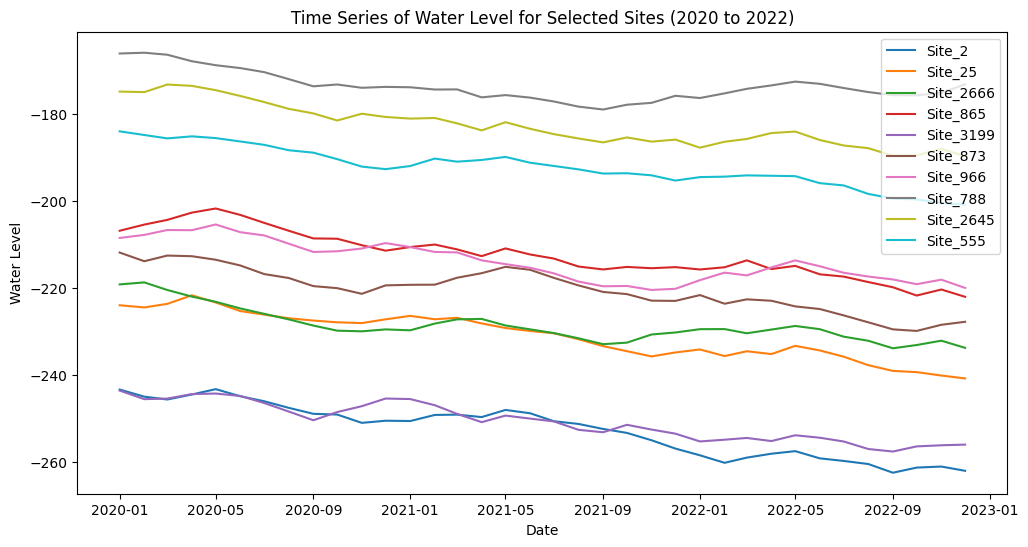

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot time series for a specific site
def plot_time_series(data, site_name):
    site_data = data[data['site'] == site_name]
    plt.plot(site_data['date'], site_data['level'], label=site_name)

# Function to filter data for the required years (2020 to 2022)
def filter_data_by_years(data):
    start_date = pd.to_datetime('2020-01-01')
    end_date = pd.to_datetime('2022-12-31')
    return data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Read the CSV file into a pandas DataFrame
file_path = 'groundwater_timeseries_data_Negative.csv'
data = pd.read_csv(file_path)

# Convert the 'date' column to datetime type
data['date'] = pd.to_datetime(data['date'])

# Filter the data for 2020 to 2022
filtered_data = filter_data_by_years(data)

# Get unique site names
site_names = data['site'].unique()

# Ask the user how many sites they want to plot
num_sites_to_plot = int(input("Enter the number of sites you want to plot: "))

# Plot the time series for the specified number of sites
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed

for i in range(num_sites_to_plot):
    site_name = input(f"Enter the name of site {i + 1}: ")
    if site_name in site_names:
        plot_time_series(filtered_data, site_name)
    else:
        print(f"Site '{site_name}' not found in the data.")

plt.xlabel('Date')
plt.ylabel('Water Level')
plt.title('Time Series of Water Level for Selected Sites (2020 to 2022)')
plt.legend()
plt.show()


# Calc Trend for file

In [1]:
def calculate_trends(df):
    sites_with_rising_trend = 0
    sites_with_falling_trend = 0
    total_sites = len(df["site"].unique())

    for site_name in df["site"].unique():
        site_data = df[df["site"] == site_name]
        initial_level = site_data.iloc[0]["level"]
        final_level = site_data.iloc[-1]["level"]
        if final_level > initial_level:
            sites_with_rising_trend += 1
        elif final_level < initial_level:
            sites_with_falling_trend += 1

    rising_percentage = (sites_with_rising_trend / total_sites) * 100
    falling_percentage = (sites_with_falling_trend / total_sites) * 100

    return rising_percentage, falling_percentage

num_sites = int(input("Enter the number of sites: "))

df = generate_time_series_data(num_sites)
rising_percentage, falling_percentage = calculate_trends(df)
save_to_csv(df)

print("File 'groundwater_timeseries_data.csv' saved.")
print(f"Sites with rising trend: {num_sites - int(falling_percentage/100 * num_sites)} "
      f"({100 - falling_percentage:.2f}%)")
print(f"Sites with falling trend: {int(falling_percentage/100 * num_sites)} "
      f"({falling_percentage:.2f}%)")


Enter the number of sites:  2


NameError: name 'generate_time_series_data' is not defined